In [1]:
import cv2,os
from tensorflow import keras
data_path='data'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels))

print(label_dict)
print(categories)
print(labels)

{'aksam': 0, 'alti': 1, 'bir': 2, 'bos': 3, 'dokuz': 4, 'dort': 5, 'hello': 6, 'icinde': 7, 'iki': 8, 'iloveyou': 9, 'isim': 10, 'istanbul': 11, 'iyi': 12, 'kisi': 13, 'lise': 14, 'nasilsin': 15, 'nerede': 16, 'no': 17, 'on': 18, 'sekiz': 19, 'sen': 20, 'sifir': 21, 'sinav': 22, 'stop': 23, 'tanismak': 24, 'turkiye': 25, 'uc': 26, 'yedi': 27, 'yes': 28}
['aksam', 'alti', 'bir', 'bos', 'dokuz', 'dort', 'hello', 'icinde', 'iki', 'iloveyou', 'isim', 'istanbul', 'iyi', 'kisi', 'lise', 'nasilsin', 'nerede', 'no', 'on', 'sekiz', 'sen', 'sifir', 'sinav', 'stop', 'tanismak', 'turkiye', 'uc', 'yedi', 'yes']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]


In [2]:
!pip install keras-visualizer

In [4]:
img_size=64
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 64x64, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)

In [5]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

In [6]:
np.save('data',data)
np.save('target',new_target)

In [7]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(64,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers


model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(29,activation='softmax'))
#The Final layer with 29 outputs for 29 categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.2)

In [10]:
test_target.shape

(2317, 29)

In [11]:
#checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
checkpoint = [
    keras.callbacks.ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto'
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=4, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=2, verbose=1),
]
history=model.fit(train_data,train_target,epochs=35,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/35
232/232 [==============================] - 28s 121ms/step - loss: 1.2251 - accuracy: 0.6478 - val_loss: 0.4266 - val_accuracy: 0.8727 - lr: 0.0010
Epoch 2/35
232/232 [==============================] - 28s 122ms/step - loss: 0.2560 - accuracy: 0.9268 - val_loss: 0.1920 - val_accuracy: 0.9461 - lr: 0.0010
Epoch 3/35
232/232 [==============================] - 29s 126ms/step - loss: 0.1191 - accuracy: 0.9637 - val_loss: 0.1181 - val_accuracy: 0.9703 - lr: 0.0010
Epoch 4/35
232/232 [==============================] - 30s 127ms/step - loss: 0.0764 - accuracy: 0.9763 - val_loss: 0.1035 - val_accuracy: 0.9763 - lr: 0.0010
Epoch 5/35
232/232 [==============================] - 29s 123ms/step - loss: 0.0469 - accuracy: 0.9841 - val_loss: 0.1086 - val_accuracy: 0.9768 - lr: 0.0010
Epoch 6/35
232/232 [==============================] - 30s 131ms/step - loss: 0.0405 - accuracy: 0.9872 - val_loss: 0.0808 - val_accuracy: 0.9806 - lr: 0.0010
Epoch 7/35
232/232 [==============================] 

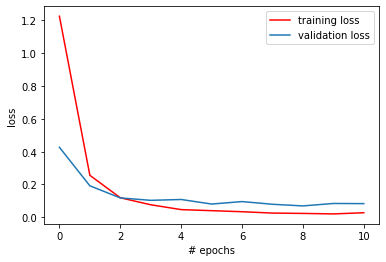

In [25]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

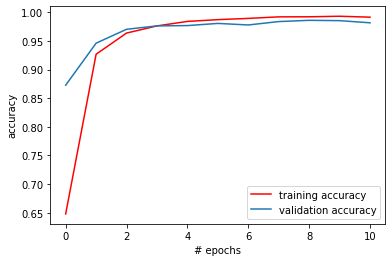

In [37]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [27]:
print(model.evaluate(test_data,test_target))

73/73 [==============================] - 2s 28ms/step - loss: 0.0715 - accuracy: 0.9845
[0.07147160172462463, 0.9844626784324646]


In [28]:
a[0][0]

NameError: name 'a' is not defined

In [30]:
test_data.shape[0]

2317

In [29]:
a=model.predict(test_data)
for x in range(test_data.shape[0]):
    for c in range(25):
        if a[x][c] > 0.98:
            a[x][c] = 1
        else:
            a[x][c] = 0   

In [31]:
a[1]

array([0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 7.8517875e-23, 3.9228192e-21, 6.1855868e-11,
       3.1769213e-26], dtype=float32)

In [32]:
test_target[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [33]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(test_target.argmax(axis=1),a.argmax(axis=1))

print(cf_matrix)


[[ 89   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   1]
 [  0  61   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   2   0   0]
 [  0   0  43   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   1   5   0   2]
 [  0   0   0  49   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  49   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   1   0   0   0]
 [  0   0   0   0   0  89   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   3   0   0]
 [  0   0   0   0   0   0  69   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  80   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   2   0   0   0]
 [  0   0   0   0   0   0   0   

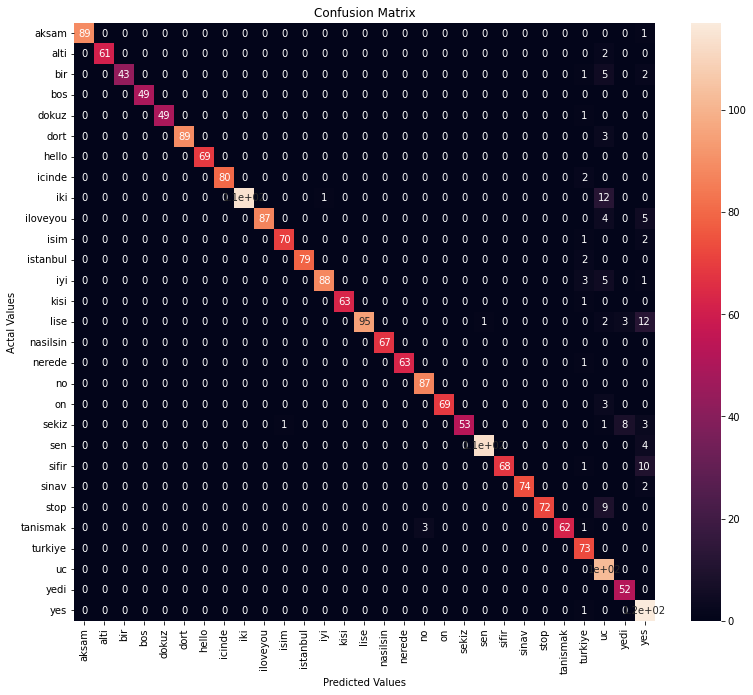

In [34]:
import pandas as pd
import seaborn as sns
cm_df = pd.DataFrame(cf_matrix,
                     index = ['aksam', 'alti', 'bir', 'bos', 'dokuz', 'dort', 'hello', 'icinde', 'iki', 'iloveyou', 'isim', 'istanbul', 'iyi', 'kisi', 'lise', 'nasilsin', 'nerede', 'no', 'on', 'sekiz', 'sen', 'sifir', 'sinav', 'stop', 'tanismak', 'turkiye', 'uc', 'yedi', 'yes'], 
                     columns = ['aksam', 'alti', 'bir', 'bos', 'dokuz', 'dort', 'hello', 'icinde', 'iki', 'iloveyou', 'isim', 'istanbul', 'iyi', 'kisi', 'lise', 'nasilsin', 'nerede', 'no', 'on', 'sekiz', 'sen', 'sifir', 'sinav', 'stop', 'tanismak', 'turkiye', 'uc', 'yedi', 'yes'])

#Plotting the confusion matrix
plt.figure(figsize=(13,11))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [35]:
#F1 Score

from sklearn.metrics import f1_score

f1_score(test_target.argmax(axis=1),a.argmax(axis=1),average = None)


array([0.99441341, 0.98387097, 0.91489362, 1.        , 0.98989899,
       0.98342541, 1.        , 0.98765432, 0.94605809, 0.95081967,
       0.97222222, 0.9875    , 0.94623656, 0.99212598, 0.91346154,
       1.        , 0.99212598, 0.98305085, 0.9787234 , 0.8907563 ,
       0.97835498, 0.92517007, 0.98666667, 0.94117647, 0.96875   ,
       0.9068323 , 0.816     , 0.90434783, 0.84476534])

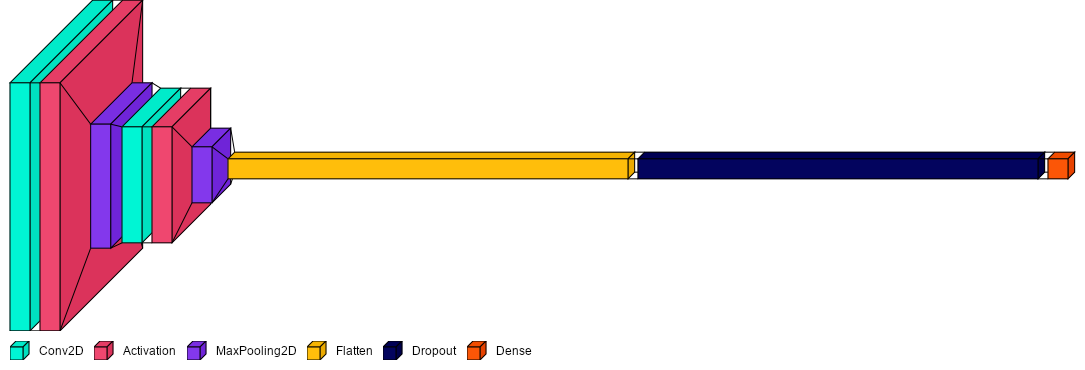

In [36]:
import visualkeras
from tensorflow.keras import layers
from collections import defaultdict
from PIL import ImageFont
font = ImageFont.truetype("arial.ttf", 12)
color_map = defaultdict(dict)
color_map[layers.Conv2D]['fill'] = '#00f5d4'
color_map[layers.MaxPooling2D]['fill'] = '#8338ec'
color_map[layers.Dropout]['fill'] = '#03045e'
color_map[layers.Dense]['fill'] = '#fb5607'
color_map[layers.Flatten]['fill'] = '#ffbe0b'
visualkeras.layered_view(model, legend=True,font=font,color_map=color_map)